### Introduction

This notebook provides an in-depth analysis of the military power of various countries around the world. The dataset used in this analysis includes a wide range of military-related metrics such as aircraft strength, tank strength, naval fleet strength, defense spending, and more. The primary objectives of this notebook are:

1. **Data Cleaning and Preprocessing**: 
   - Load the dataset and inspect its structure.
   - Handle missing values and convert data types as necessary.
   - Remove unnecessary columns to streamline the analysis.

2. **Exploratory Data Analysis (EDA)**:
   - Generate summary statistics and visualizations to understand the distribution and relationships within the data.
   - Identify and handle any anomalies or outliers in the dataset.

3. **Feature Engineering**:
   - Create new features that may provide additional insights, such as continent information for each country.
   - Normalize and scale the data to prepare it for machine learning models.


4. **Clustering Analysis**:
   - Use K-Means clustering to group countries into clusters based on their military capabilities.
   - Visualize the clusters and interpret the results to identify patterns and similarities among countries.

By the end of this notebook, we aim to gain a comprehensive understanding of the military power distribution across different countries and identify key factors that contribute to a country's military strength. This analysis can provide valuable insights for policymakers, researchers, and defense analysts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('data/World military power.xlsx', skiprows=1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [3]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [4]:
df.shape

(138, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [6]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Total Coastline Coverage                   29
Submarine Fleet Strength                   23
Frigate Fleet Strength value               23
Frigate Fleet Strength                     23
Destroyer Fleet Strength value             23
Destroyer Fleet Strength                   23
Submarine Fleet Strength value             23
Aircraft Carrier Fleet Strength value      23
Aircraft Carrier Fleet Strength            23
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Total Border Coverage                       9
Total Border Coverage value                 9
Attack Helicopter Fleet Strength            0
Available Manpower                          0
External Debt value                         0
Airport Totals                              0
Airport Totals value                        0
Oil Production                              0
Oil Production value                        0
Oil Consumption                   

In [7]:
df["Total Coastline Coverage"].unique(), df["Total Coastline Coverage"].value_counts()

(array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', nan,
        'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
        'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
        'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
        'Cuba', 'Democratic Republic of the Congo', 'Denmark',
        'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
        'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
        'Greece', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Iran',
        'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan',
        'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon',
        'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia',
        'Mauritania', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique',
        'Myanmar', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua',
        'Nigeria', 'North Korea', 'Norway', 'Oman', 'Pakistan', 'Panama',
        '

## Delete columns that are not needed

In [8]:
df["Country"] = df["Military Strength"]

In [9]:
df.drop([
    "Military Strength",
    "Aircraft Strength",
    "Fighter/Interceptor Strength",
    "Attack Aircraft Strength",
    "Transport Aircraft Fleet Strength",
    "Trainer Aircraft Fleet",
    "Helicopter Fleet Strength",
    "Attack Helicopter Fleet Strength",
    "Tank Strength",
    "AFV/APC Strength",
    "Self-Propelled Artillery Strength",
    "Towed Artillery Strength",
    "Rocket Projector Strength",
    "Navy Fleet Strengths",
    "Aircraft Carrier Fleet Strength",
    "Submarine Fleet Strength",
    "Destroyer Fleet Strength",
    "Frigate Fleet Strength",
    "defense spending budget",
    "External Debt",
    "Airport Totals",
    "Oil Production",
    "Oil Consumption",
    "Proven Oil Reserves",
    "Available Manpower",
    "Total Population",
    "Total Square Land Area",
    "Total Coastline Coverage",
    "Total Waterway Coverage",
    "Total Border Coverage"
]
    , axis=1, inplace=True)



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

## Some object columns are converted to float/int

In [11]:
df["Total Coastline Coverage value"].unique()

array([0, 362, 998, 1600, 4989, nan, 25760, 713, 161, 580, 67, 20, 7491,
       354, 443, 400, '2,02,080', 6435, 14500, 3208, 5835, 3735, 37, 7314,
       1288, 2237, 2450, 307, 3794, 1250, 4853, 885, 310, 2389, 539,
       13676, 832, 7000, 54716, 2440, 58, 1448, 273, 7600, 515, 29751, 26,
       536, 499, 498, 225, 579, 1770, 90, 4828, 4675, 754, 9330, 294,
       1835, 2470, 1930, 1572, 451, 15134, 910, 853, 2495, 25148, 2092,
       1046, 2490, 2414, 36289, 440, 1793, 563, 169, 37653, 2640, 402,
       193, 47, 3025, 2798, 2413, 4964, 1340, 386, 3218, 1566, 1424, 3219,
       1148, 7200, 1768, 2782, 1318, 12429, 19924, 660, 420, 2800, 3444,
       1906], dtype=object)

In [12]:
df["Total Waterway Coverage value"].unique()

array([1200, 41, 0, 1300, 11000, 2000, 8370, 2500, 2043, 10000, 50000,
       470, 3700, 636, 2800, 12290, '1,10,000', 24725, 785, 240, 664,
       15000, 400, 350, 1500, 3500, 335, '1,04,300', 7842, 8501, 1600,
       4349, 7467, 1293, 6, 990, 465, 1622, 14500, 21579, 850, 5279, 956,
       2400, 980, 1770, 540, 600, 4600, 300, 170, 441, 7200, 2900, 558,
       580, 460, 12800, 6237, 2220, 8600, 2250, 280, 1577, 25220, 800,
       3100, 8808, 3219, 3997, 210, 1120, 1731, '1,02,000', 587, 10, 172,
       1000, 160, 1723, 2052, 1299, 900, 3720, 200, 4000, 2150, 3200,
       41009, 1100, 7100, 17702], dtype=object)

In [13]:
objects = df.select_dtypes(include=["object"]).columns
# remove "Country"
objects = objects.drop("Country")
objects

Index(['defense spending budget value', 'External Debt value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value'],
      dtype='object')

In [14]:
for col in objects:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [15]:
df["Total Waterway Coverage value"].value_counts()


Total Waterway Coverage value
0.0         38
1200.0       3
1600.0       3
800.0        2
300.0        2
            ..
8501.0       1
7842.0       1
104300.0     1
335.0        1
17702.0      1
Name: count, Length: 92, dtype: int64

In [16]:
df["Total Coastline Coverage value"].unique()

array([0.0000e+00, 3.6200e+02, 9.9800e+02, 1.6000e+03, 4.9890e+03,
              nan, 2.5760e+04, 7.1300e+02, 1.6100e+02, 5.8000e+02,
       6.7000e+01, 2.0000e+01, 7.4910e+03, 3.5400e+02, 4.4300e+02,
       4.0000e+02, 2.0208e+05, 6.4350e+03, 1.4500e+04, 3.2080e+03,
       5.8350e+03, 3.7350e+03, 3.7000e+01, 7.3140e+03, 1.2880e+03,
       2.2370e+03, 2.4500e+03, 3.0700e+02, 3.7940e+03, 1.2500e+03,
       4.8530e+03, 8.8500e+02, 3.1000e+02, 2.3890e+03, 5.3900e+02,
       1.3676e+04, 8.3200e+02, 7.0000e+03, 5.4716e+04, 2.4400e+03,
       5.8000e+01, 1.4480e+03, 2.7300e+02, 7.6000e+03, 5.1500e+02,
       2.9751e+04, 2.6000e+01, 5.3600e+02, 4.9900e+02, 4.9800e+02,
       2.2500e+02, 5.7900e+02, 1.7700e+03, 9.0000e+01, 4.8280e+03,
       4.6750e+03, 7.5400e+02, 9.3300e+03, 2.9400e+02, 1.8350e+03,
       2.4700e+03, 1.9300e+03, 1.5720e+03, 4.5100e+02, 1.5134e+04,
       9.1000e+02, 8.5300e+02, 2.4950e+03, 2.5148e+04, 2.0920e+03,
       1.0460e+03, 2.4900e+03, 2.4140e+03, 3.6289e+04, 4.4000e

In [17]:
df["Total Coastline Coverage value"].value_counts() 

Total Coastline Coverage value
853.0     2
193.0     2
225.0     2
26.0      2
400.0     2
         ..
2389.0    1
310.0     1
885.0     1
4853.0    1
1906.0    1
Name: count, Length: 104, dtype: int64

In [18]:
df["defense spending budget value"].unique()

array([1.20000000e+10, 2.50000000e+08, 1.30000000e+10, 7.00000000e+09,
       4.20000000e+09, 1.38500000e+09, 2.63000000e+10, 3.38000000e+09,
       2.80500000e+09, 1.41500000e+09, 3.80000000e+09, 6.23702800e+08,
       4.92100000e+09, 2.51200000e+07, 6.60000000e+08, 1.65000000e+08,
       4.50000000e+08, 2.78000000e+10, 1.07900000e+09, 1.30000000e+08,
       6.04000000e+08, 3.47000000e+08, 2.25000000e+10, 2.00000000e+07,
       2.00000000e+08, 4.25000000e+09, 2.37000000e+11, 1.06000000e+10,
       8.00000000e+08, 5.00000000e+08, 2.96900000e+09, 1.00000000e+08,
       4.76000000e+09, 7.60000000e+08, 2.50000000e+09, 1.12000000e+10,
       1.67000000e+08, 6.85000000e+08, 3.50000000e+08, 3.57000000e+09,
       4.15000000e+10, 8.30000000e+07, 3.27000000e+08, 5.00000000e+10,
       7.10000000e+08, 4.84400000e+09, 2.40000000e+08, 2.05000000e+08,
       2.08000000e+09, 6.10000000e+10, 7.60000000e+09, 1.96000000e+10,
       1.73000000e+09, 8.70000000e+08, 2.00000000e+10, 5.50000000e+08,
      

In [19]:
# df["defense spending budget value"] = df["defense spending budget value"].str.replace(",", "").astype(float)
df.select_dtypes(include="object").columns

Index(['Country'], dtype='object')

In [20]:
df.shape

(138, 31)

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.shape

(138, 31)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [24]:
# Country will be first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [25]:
df.isnull().sum().sort_values(ascending=False).head(7) # just missing columns

Total Coastline Coverage value           29
Aircraft Carrier Fleet Strength value    23
Frigate Fleet Strength value             23
Destroyer Fleet Strength value           23
Submarine Fleet Strength value           23
Navy Fleet Strengths value               14
Total Border Coverage value               9
dtype: int64

In [26]:
df["Total Border Coverage value"].unique()

array([ 5987.,   691.,  6734.,  5369., 11968.,  1570.,    nan,  2524.,
        2468.,  4413.,  3599.,  1297.,  1136.,  7252.,  1543.,  4347.,
       16145.,  1806.,  3611.,  2530.,  5018.,  8893.,  5920.,  6406.,
        7801., 22457.,  6672.,  2237.,    29.,  2046., 10481.,   140.,
         376.,  2612.,   590.,   657.,  5925.,  2563.,  4072.,  3261.,
        1814.,  3694.,  2420.,  1110.,  1667.,  1575.,  2106., 13888.,
        2958.,  5894.,  3809.,   443.,  1068.,  1836.,  3458.,  1744.,
       13364.,  3457.,   475.,  4573.,  5274.,  1370.,   484.,  4339.,
        1545.,  2742.,  7908.,  5002.,  4389.,  1885.,  8082.,   680.,
        2363.,  4783.,  6522.,  4220.,  3159.,  1053.,  1253.,  5834.,
        4477.,  1607.,   838.,  2566.,  1561.,  7257.,   687.,  4655.,
        7062.,  2845.,  1224.,    87.,  5008.,  2844., 22408.,  4272.,
        2322.,  1093.,  1587.,  1211.,  2385.,  5244.,   237.,  6018.,
        1953.,  6819.,  1907.,  2211.,  1770.,  4130.,  4161.,  5673.,
      

In [27]:
df.corr(numeric_only=True).abs()["Total Border Coverage value"].sort_values(ascending=False).head(10).index[1:]

Index(['Total Square Land Area value', 'Total Waterway Coverage value',
       'Attack Aircraft Strength value', 'Available Manpower value',
       'Total Population value', 'Rocket Projector Strength value',
       'Submarine Fleet Strength value',
       'Transport Aircraft Fleet Strength value',
       'Towed Artillery Strength value'],
      dtype='object')

In [28]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [29]:
missing =df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0].index
missing

Index(['Total Coastline Coverage value',
       'Aircraft Carrier Fleet Strength value', 'Frigate Fleet Strength value',
       'Destroyer Fleet Strength value', 'Submarine Fleet Strength value',
       'Navy Fleet Strengths value', 'Total Border Coverage value'],
      dtype='object')

In [30]:
df.corr(numeric_only=True).abs().mean().sum()

15.959961730067821

In [31]:
# fill with knn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[missing] = imputer.fit_transform(df[missing])

In [32]:
df.corr(numeric_only=True).abs().mean().sum()

15.850540382365168

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [34]:
# scaling
scaler = StandardScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.614308,-0.190354,-0.354766,-0.196505,-0.586451,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.110873,-0.136390,-0.336803,-0.259460,0.559273
1,Albania,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.340214,-0.190354,-0.354766,-0.196505,-0.586451,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.304683,-0.417556,-0.317703,-0.329981,-0.901689
2,Algeria,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.835507,-0.190354,0.122405,-0.196505,0.250643,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,-0.070045,0.643550,-0.284147,-0.332476,0.765341
3,Angola,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.203166,-0.190354,-0.354766,-0.196505,-0.586451,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,-0.138744,0.131692,-0.252385,-0.253375,0.388790
4,Argentina,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.260870,-0.190354,-0.195709,0.242293,-0.586451,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,-0.051586,0.823329,-0.073579,0.336841,2.209199


# Get continent name from country column

In [35]:
import pycountry
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return None

df['Continent'] = df['Country'].apply(get_continent)

df_dummy = pd.get_dummies(df, columns=['Continent'], drop_first=True)
df_dummy.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Afghanistan,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.614308,-0.190354,-0.354766,-0.196505,-0.586451,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.110873,-0.136390,-0.336803,-0.259460,0.559273,True,False,False,False,False
1,Albania,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.340214,-0.190354,-0.354766,-0.196505,-0.586451,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.304683,-0.417556,-0.317703,-0.329981,-0.901689,False,True,False,False,False
2,Algeria,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.835507,-0.190354,0.122405,-0.196505,0.250643,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,-0.070045,0.643550,-0.284147,-0.332476,0.765341,False,False,False,False,False
3,Angola,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.203166,-0.190354,-0.354766,-0.196505,-0.586451,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,-0.138744,0.131692,-0.252385,-0.253375,0.388790,False,False,False,False,False
4,Argentina,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.260870,-0.190354,-0.195709,0.242293,-0.586451,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,-0.051586,0.823329,-0.073579,0.336841,2.209199,False,False,False,False,True


In [36]:
df = df_dummy

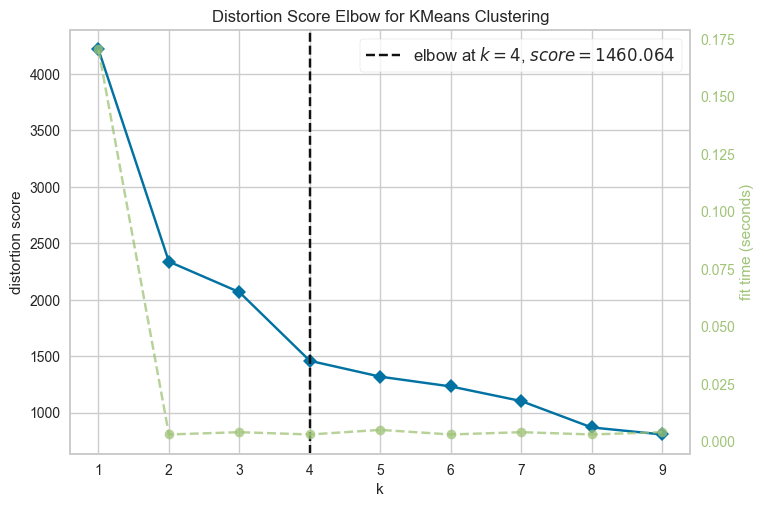

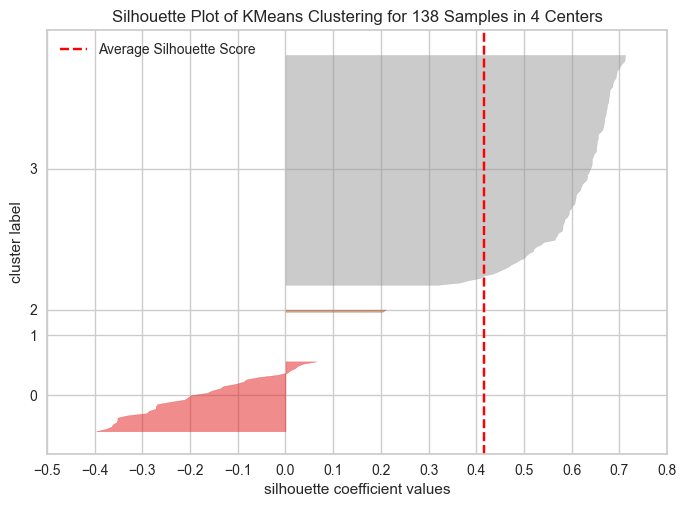

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 138 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df.drop('Country', axis=1))
visualizer.show()

optimal_k = visualizer.elbow_value_
model = KMeans(n_clusters=optimal_k)

visualizer = SilhouetteVisualizer(model)
visualizer.fit(df.drop('Country', axis=1))
visualizer.show()

In [38]:
model.fit(df.drop('Country', axis=1))


df['Cluster'] = model.labels_

df.head()


,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Cluster
0,Afghanistan,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.614308,-0.190354,-0.354766,-0.196505,-0.586451,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.110873,-0.136390,-0.336803,-0.259460,0.559273,True,False,False,False,False,0
1,Albania,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.340214,-0.190354,-0.354766,-0.196505,-0.586451,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.304683,-0.417556,-0.317703,-0.329981,-0.901689,False,True,False,False,False,0
2,Algeria,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.835507,-0.190354,0.122405,-0.196505,0.250643,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,-0.070045,0.643550,-0.284147,-0.332476,0.765341,False,False,False,False,False,0
3,Angola,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.203166,-0.190354,-0.354766,-0.196505,-0.586451,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,-0.138744,0.131692,-0.252385,-0.253375,0.388790,False,False,False,False,False,0
4,Argentina,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.260870,-0.190354,-0.195709,0.242293,-0.586451,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,-0.051586,0.823329,-0.073579,0.336841,2.209199,False,False,False,False,True,0


In [39]:
#Cluster column will be first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]



In [40]:
df.sample(4)

,Cluster,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
24,0,Chad,0.134614,-0.287958,-0.355421,-0.209809,-0.263404,-0.328569,-0.264454,-0.233294,-0.388463,-0.392085,-0.294894,-0.427197,-0.304451,0.598920,0.032263,0.281461,0.066774,0.485029,-0.205668,-0.281316,-0.191172,-0.275453,-0.278591,-0.245192,-0.230547,-0.227023,0.148513,-0.263054,-0.332476,0.674859,False,False,False,False,False
132,0,Uzbekistan,-0.494322,-0.165759,-0.067826,-0.061165,-0.132962,-0.336904,-0.144831,-0.006426,-0.150047,-0.235711,-0.109637,-0.490720,-0.122114,-0.614308,-0.190354,-0.259332,-0.196505,-0.184646,-0.194112,-0.273070,-0.196136,-0.324777,-0.259155,-0.266461,-0.113187,-0.140763,-0.228760,-0.314643,-0.265544,0.809203,True,False,False,False,False
130,1,United States,-1.061327,10.489144,8.729991,7.317921,9.943640,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268,False,False,True,False,False
42,0,Georgia,0.157051,-0.262703,-0.355421,-0.167339,-0.306884,-0.295225,-0.223936,-0.171421,-0.333495,-0.284868,-0.208830,-0.325062,-0.219498,-0.549391,-0.190354,-0.354766,-0.196505,-0.586451,-0.203774,-0.273021,-0.221787,-0.352271,-0.316307,-0.279585,-0.275453,-0.293323,-0.399088,-0.320447,-0.067852,-0.591896,True,False,False,False,False


In [41]:
df.Cluster.value_counts()

Cluster
0    134
2      2
3      1
1      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Cluster Counts')

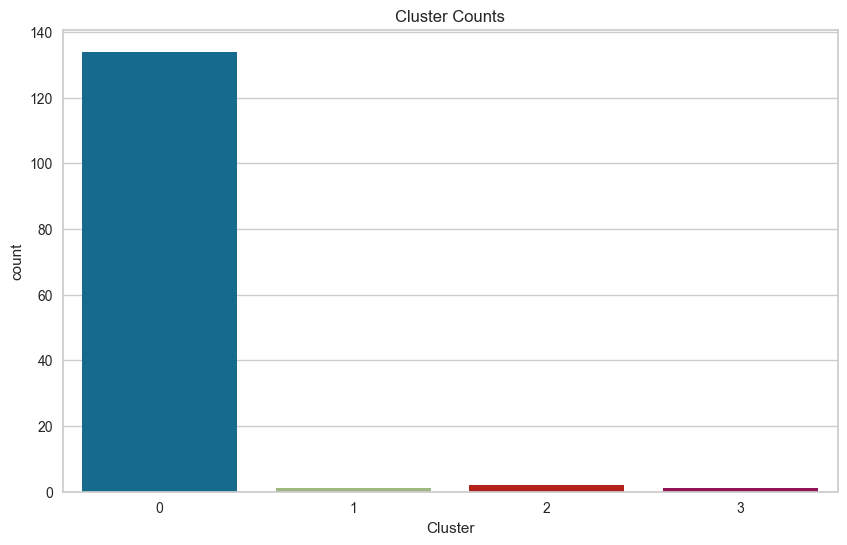

In [42]:
#plot 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Cluster')
plt.title('Cluster Counts')


In [43]:
# Cluster 0
df[df.Cluster == 0].sample()


,Cluster,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
24,0,Chad,0.134614,-0.287958,-0.355421,-0.209809,-0.263404,-0.328569,-0.264454,-0.233294,-0.388463,-0.392085,-0.294894,-0.427197,-0.304451,0.59892,0.032263,0.281461,0.066774,0.485029,-0.205668,-0.281316,-0.191172,-0.275453,-0.278591,-0.245192,-0.230547,-0.227023,0.148513,-0.263054,-0.332476,0.674859,False,False,False,False,False


In [44]:
df[df.Cluster == 0].describe()

,Cluster,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.0,0.031395,-0.128923,-0.143139,-0.150304,-0.139695,-0.108293,-0.119605,-0.130788,-0.120813,-0.135710,-0.116854,-0.123524,-0.116191,-0.097663,-0.093997,-0.118792,-0.119388,-0.076199,-0.115725,-0.074893,-0.089065,-0.099565,-0.134398,-0.017342,-0.131889,-0.133376,-0.121121,-0.021082,-0.111546,-0.113149
std,0.0,1.001664,0.260352,0.368517,0.241300,0.245940,0.361037,0.252231,0.235459,0.589941,0.512342,0.491256,0.698594,0.577186,0.810013,0.346867,0.670486,0.415835,0.711047,0.172768,0.598429,0.353359,0.719103,0.340653,1.007272,0.252361,0.272114,0.617607,1.005712,0.651149,0.735088
min,0.0,-0.993484,-0.316471,-0.355421,-0.273513,-0.328624,-0.345240,-0.297254,-0.264231,-0.428199,-0.461090,-0.309482,-0.490720,-0.325171,-0.614308,-0.190354,-0.354766,-0.196505,-0.586451,-0.208456,-0.281959,-0.238335,-0.352511,-0.323942,-0.280406,-0.300596,-0.319633,-0.430206,-0.336803,-0.332476,-1.084309
25%,0.0,-0.645397,-0.291420,-0.355421,-0.273513,-0.296014,-0.328569,-0.268313,-0.264231,-0.416113,-0.414994,-0.309482,-0.464564,-0.325171,-0.527752,-0.190354,-0.354766,-0.196505,-0.586451,-0.204643,-0.277399,-0.214547,-0.352511,-0.309828,-0.280406,-0.273151,-0.288247,-0.392789,-0.308048,-0.332476,-0.652724
50%,0.0,-0.241975,-0.228080,-0.292237,-0.273513,-0.230793,-0.247295,-0.214289,-0.243606,-0.332502,-0.335694,-0.280307,-0.359937,-0.279586,-0.336607,-0.190354,-0.354766,-0.196505,-0.419032,-0.182333,-0.260903,-0.186621,-0.345588,-0.272344,-0.278724,-0.232867,-0.245457,-0.298939,-0.230848,-0.283798,-0.291897
75%,0.0,0.430264,-0.092236,-0.116848,-0.119561,-0.089482,-0.038900,-0.104314,-0.099236,-0.153358,-0.102199,-0.181479,-0.162206,-0.142834,-0.042677,-0.190354,-0.116181,-0.196505,0.300869,-0.121052,-0.192768,-0.118565,-0.264060,-0.174470,-0.243431,-0.111421,-0.106584,-0.099692,-0.108285,-0.181880,0.266736
max,0.0,6.600442,1.026899,1.640319,0.936869,1.041011,1.792887,1.252056,0.962917,3.575210,2.135875,4.125033,4.309637,4.046774,6.483293,2.035815,6.246088,4.191478,3.096764,0.799289,4.132741,3.146672,5.745903,1.526181,6.783682,1.252077,1.274131,4.072166,10.325097,6.013866,3.361472


In [45]:

# Cluster 1 names plot
df[df.Cluster == 1].sample()


,Cluster,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
130,1,United States,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268,False,False,True,False,False


In [46]:
df[df.Cluster == 1].describe()

,Cluster,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,1.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,1.0,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268
25%,1.0,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268
50%,1.0,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268
75%,1.0,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268
max,1.0,-1.061327,10.489144,8.729991,7.317921,9.94364,10.670489,10.831533,9.707636,3.736804,6.820244,1.827546,2.922092,2.505197,2.920067,10.940489,4.894106,9.786157,-0.586451,10.974103,9.448554,10.941042,5.277535,8.930373,0.576956,1.418403,1.678174,4.000916,0.714403,2.162799,2.231268


In [47]:
df[df.Cluster == 3].sample()

,Cluster,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
101,3,Russia,-1.055642,3.074948,3.448687,7.60459,4.280307,1.7262,2.639295,5.211531,8.14817,4.554392,8.563924,5.070669,7.672794,3.735137,0.366189,4.575993,1.558688,1.087737,0.507046,0.010922,0.767817,6.01681,1.16754,1.597716,0.524906,0.54065,7.280101,1.649799,5.873918,5.089191,False,False,False,False,False


In [48]:
df.drop("Cluster", axis=1, inplace=True)

# PCA

In [49]:
# pca ( %95 variance)
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(df.drop('Country', axis=1))
pca.explained_variance_ratio_

array([0.55634978, 0.13485753, 0.06225208, 0.0523213 , 0.03522137,
       0.03174938, 0.02530813, 0.02062399, 0.01604631, 0.00975208,
       0.00867568])

In [50]:
# cluster 
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)
model.fit(pca.transform(df.drop('Country', axis=1)))


KMeans(n_clusters=4, random_state=42)

In [51]:
df['Cluster'] = model.labels_


In [52]:

#Cluster column will be first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.sample(4)

,Cluster,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
12,1,Belgium,-0.31141,-0.195901,-0.168048,-0.273513,-0.198183,-0.078495,-0.241301,-0.264231,-0.428199,-0.278561,-0.309482,-0.490720,-0.325171,-0.491687,-0.190354,-0.354766,-0.196505,-0.251614,-0.135276,0.413737,-0.206066,-0.352511,-0.026386,-0.280406,-0.244772,-0.252932,-0.416753,-0.333268,-0.208166,-0.734517,False,True,False,False,False
97,1,Portugal,-0.45445,-0.243152,-0.250841,-0.273513,-0.209053,-0.270218,-0.252877,-0.264231,-0.340118,-0.320854,-0.283225,-0.414742,-0.325171,-0.318575,-0.190354,-0.195709,-0.196505,0.250643,-0.158581,-0.038303,-0.187035,-0.352511,-0.202236,-0.280406,-0.245106,-0.260320,-0.388991,-0.242203,-0.319698,-0.754655,False,True,False,False,False
100,1,Romania,-0.63903,-0.199975,-0.242126,-0.273513,-0.198183,-0.174357,-0.177631,-0.264231,0.196319,-0.207144,-0.309482,0.515686,0.178328,-0.268084,-0.190354,-0.354766,-0.196505,-0.084195,-0.133353,-0.230110,-0.202756,-0.308119,-0.213805,-0.266321,-0.171442,-0.192836,-0.323015,-0.324932,-0.227150,-0.307759,False,True,False,False,False
79,1,Myanmar,-0.67587,-0.091625,-0.098328,-0.050548,-0.035131,-0.003473,-0.131325,-0.171421,-0.140775,-0.219944,-0.151940,1.517109,-0.151122,0.734525,-0.190354,-0.275237,-0.196505,0.250643,-0.169137,-0.278670,-0.187035,-0.345287,-0.305154,-0.277143,0.057193,0.014844,-0.125410,-0.234974,0.446366,0.706859,True,False,False,False,False


In [53]:

df.Cluster.value_counts()

Cluster
1    127
0      8
2      2
3      1
Name: count, dtype: int64

In [54]:
df[df.Cluster == 0]["Country"]

35            Egypt
49            India
51             Iran
87      North Korea
91         Pakistan
102    Saudi Arabia
110     South Korea
124          Turkey
Name: Country, dtype: object

In [55]:
df[df.Cluster == 1]["Country"]

0      Afghanistan
1          Albania
2          Algeria
3           Angola
4        Argentina
          ...     
133      Venezuela
134        Vietnam
135          Yemen
136         Zambia
137       Zimbabwe
Name: Country, Length: 127, dtype: object

In [56]:
df[df.Cluster == 2]["Country"]

26      China
101    Russia
Name: Country, dtype: object

In [57]:
df[df.Cluster == 3]["Country"]

130    United States
Name: Country, dtype: object